In [1]:
import pathlib
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedFormatter,FixedLocator
import seaborn as sns
from tqdm import tqdm

## util functions

In [2]:
def pred_fn(inps, refs, n_class):
    n_inps = int(len(inps)/n_class)    # img per class of input
    n_refs = int(len(refs)/n_class)    # img per class of reference
    y_true = np.array([i//(n_inps*n_refs) for i in range(n_class*n_inps*n_refs)])
    y_pred = np.empty((0), int)
    for n in range(n_class):
        a = inps[n_inps*n:n_inps*(n+1)]
        arr = np.empty((0,n_inps,n_refs), float)
        for i in list(range(n_class)):
            b = refs[n_refs*i:n_refs*(i+1)]
            dists = (-2*np.dot(a, b.T) 
                     + np.sum(b**2, axis=1) 
                     + np.sum(a**2, axis=1)[:, np.newaxis])
            arr = np.append(arr, dists[np.newaxis, :], axis=0)
        y_pred = np.append(y_pred, np.argmin(arr, axis=0))
    return y_true, y_pred

def plot_prfs(ax, y_true, y_pred, title: str):
    P, R, F, _ = precision_recall_fscore_support(y_true, y_pred)
    label = [str(i) for i in F.argsort()]
    P = P[F.argsort()]
    R = R[F.argsort()]
    F = F[F.argsort()]
    ax.plot(label, P, 'o', color='seagreen', label='Precision')
    ax.plot(label, R, 'o', color='darkorange', label='Recall')
    ax.plot(label, F, '-o', color='royalblue', label='F1-score')
    ax.grid(True,axis='y')
    ax.set_title(title, pad=15)
    ax.set_xticks(range(len(label)))
    ax.set_xticklabels(label)
    ax.set_xlabel("k(class number)")
    ax.set_ylabel("Performance metric (%)")
    ax.legend(loc='lower right')
    
def plot_confusion_matrix(ax, y_true, y_pred, title: str, fontsize: float):
    cf_matrix = confusion_matrix(y_true, y_pred, normalize='true')
    ax.set_title(title, pad=15)
    ax.set_xlabel('Predicted labels', labelpad=15);
    ax.set_ylabel('True labels', labelpad=15);
    sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": fontsize}, ax=ax)
    
def plot_acc(ax, acc, title:str):
    ax.plot(list(acc.keys()), list(acc.values()), '--o', color='royalblue')
    ax.grid(True,axis='both')
    ax.set_xlabel("L-shot")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title(title, pad=15)
    ax.xaxis.set_major_locator(FixedLocator(list(acc.keys())))
    ax.xaxis.set_minor_locator(FixedLocator([i for i in range(20)]+[22,24,26,28,35,40,45,60,70,90])) 
    
def mean_d(inps, refs, n_class):
    n_inps = int(len(inps)/n_class)    # img per class of input
    n_refs = int(len(refs)/n_class)    # img per class of reference
    for n in range(n_class):
        a = inps[n_inps*n:n_inps*(n+1)]
        d = []
        for i in list(range(n_class)):
            b = refs[n_refs*i:n_refs*(i+1)]
            dists = (-2*np.dot(a, b.T) 
                     + np.sum(b**2, axis=1) 
                     + np.sum(a**2, axis=1)[:, np.newaxis])
            d.append(np.mean(dists))
        print(d.index(min(d)), d[d.index(min(d))])

## Load embeddings, metadata -> y_true, y_pred

In [3]:
param_path = "./exp/0411Full/100_02/"
logdir = pathlib.Path(param_path).joinpath('feats')
X = np.loadtxt(str(logdir.joinpath("vec300.tsv")), dtype=np.float, delimiter='\t')
Y = np.loadtxt(str(logdir.joinpath("meta300.tsv")), dtype=int, delimiter='\t')
y_true, y_pred = pred_fn(X, X, 19)
ds_y_true, ds_y_pred = pred_fn(X[:300*14], X[:300*14], 14)
dt_y_true, dt_y_pred = pred_fn(X[300*14:], X[300*14:], 5)

## Plot fig

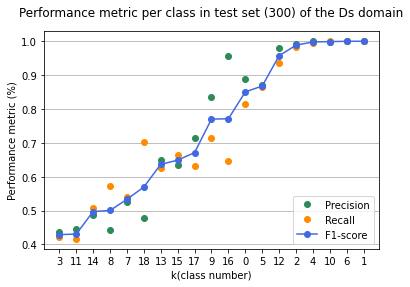

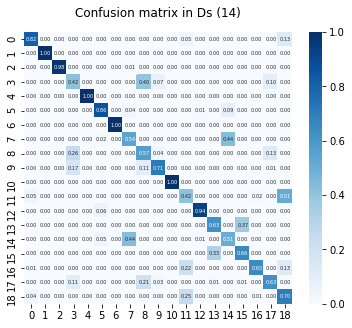

In [4]:
fig, ax = plt.subplots()
plot_prfs(ax, y_true, y_pred, 'Performance metric per class in test set (300) of the Ds domain')
fig, ax = plt.subplots(figsize=(6, 5))
plot_confusion_matrix(ax, y_true, y_pred, 'Confusion matrix in Ds (14)', 5)

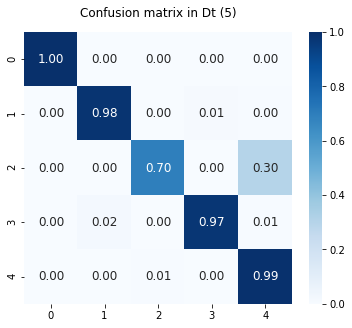

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))
plot_confusion_matrix(ax, dt_y_true, dt_y_pred, 'Confusion matrix in Dt (5)', 12)

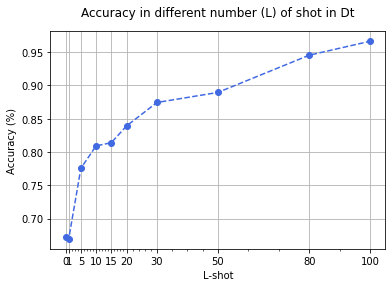

In [6]:
dt_acc = {
    0: 0.6722733333333333,
    1: 0.6693311111111111,
    5: 0.7755911111111111,
    10: 0.8091888888888888,
    15: 0.8140066666666667,
    20: 0.8391711111111111,
    30: 0.8744333333333333,
    50: 0.8895133333333334,
    80: 0.9454933333333333,
    100: 0.9664955555555556
}

fig, ax = plt.subplots()
plot_acc(ax, dt_acc, 'Accuracy in different number (L) of shot in Dt')

---

In [7]:
X = np.loadtxt(str(logdir.joinpath("vec100.tsv")), dtype=np.float, delimiter='\t')
Y = np.loadtxt(str(logdir.joinpath("meta100.tsv")), dtype=int, delimiter='\t')
y_true, y_pred = pred_fn(X, X, 19)
ds_y_true, ds_y_pred = pred_fn(X[:100*14], X[:100*14], 14)
dt_y_true, dt_y_pred = pred_fn(X[100*14:], X[100*14:], 5)

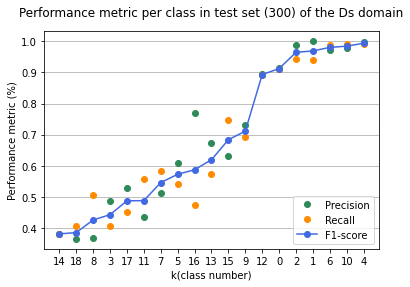

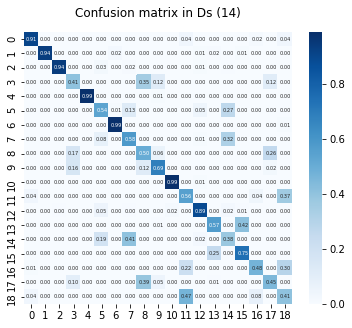

In [8]:
fig, ax = plt.subplots()
plot_prfs(ax, y_true, y_pred, 'Performance metric per class in test set (300) of the Ds domain')
fig, ax = plt.subplots(figsize=(6, 5))
plot_confusion_matrix(ax, y_true, y_pred, 'Confusion matrix in Ds (14)', 5)

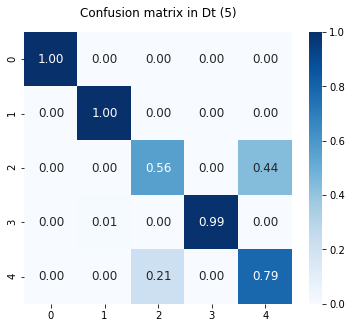

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
plot_confusion_matrix(ax, dt_y_true, dt_y_pred, 'Confusion matrix in Dt (5)', 12)

In [10]:
mean_d(X, X, 19)

0 0.00818760272925752
1 0.013990303701404496
2 0.008338063567861672
8 0.008318418085193633
4 0.008162801599410274
14 0.010079328511370642
6 0.008280666072250633
7 0.00815216504236789
8 0.008190504702210992
9 0.008713742872731857
10 0.008338156631406062
11 0.00862232953185813
12 0.010271218253267626
15 0.00905014610608458
7 0.008437521594763436
15 0.008209185427487355
11 0.014128380108185973
8 0.008884015641687077
11 0.009872867327770152
